<img src='BC.jpg'>

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('restaurant.csv')

## EDA

In [289]:
df.head()

,stars,text
0,5,after getting food poisoning at the palms hote...
1,4,"""a feast worthy of gods""baccarnal buffet in ca..."
2,4,the crab legs are better than the ones at wick...
3,1,not worth it! too salty food and expensive! th...
4,5,i would give this infinite stars if i could. m...


In [5]:
df['useful'].sum()

14788

In [6]:
import seaborn as sns

<Axes: xlabel='useful', ylabel='count'>

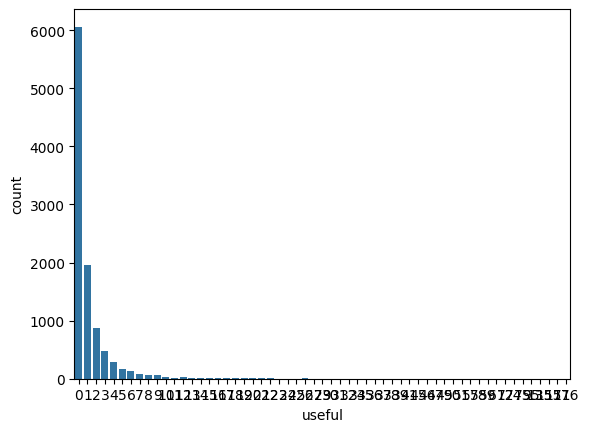

In [7]:
sns.countplot(x=df['useful'])

<Axes: xlabel='funny', ylabel='count'>

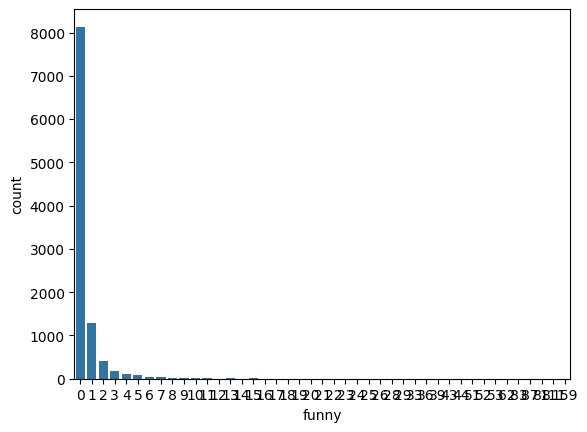

In [8]:
sns.countplot(x=df['funny'])

In [9]:
df=df[['stars','text']]

In [10]:
df.isnull().sum()

stars    0
text     0
dtype: int64

In [11]:
df.shape

(10417, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   text    10417 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.9+ KB


In [13]:
df.text[0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [14]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','')
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\'','')
df['text']=df['text'].str.replace('\r','')

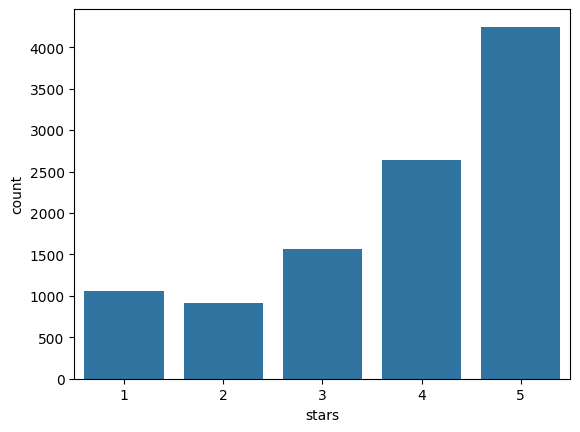

In [15]:
sns.countplot(x=df['stars']);

### SENTİMENT ANALİZİ

In [54]:
yelpbw=df[(df.stars==1)|(df.stars==5)]

In [55]:
yelpbw

,stars,text
0,5,after getting food poisoning at the palms hote...
3,1,not worth it! too salty food and expensive! th...
4,5,i would give this infinite stars if i could. m...
5,5,really enjoyed everything they had to offer. i...
8,5,lots of choices. good service. line wasnt as l...
...,...,...
10409,5,we went to bacchanal on easter sunday as it wa...
10410,1,came him from la! thanksgiving week. we decide...
10411,5,every time we visit las vegas we go to this bu...
10412,5,"best buffet ever! irma was great, served us be..."


In [56]:
yelpbw.reset_index(drop=True,inplace=True)

In [57]:
yelpbw

,stars,text
0,5,after getting food poisoning at the palms hote...
1,1,not worth it! too salty food and expensive! th...
2,5,i would give this infinite stars if i could. m...
3,5,really enjoyed everything they had to offer. i...
4,5,lots of choices. good service. line wasnt as l...
...,...,...
5298,5,we went to bacchanal on easter sunday as it wa...
5299,1,came him from la! thanksgiving week. we decide...
5300,5,every time we visit las vegas we go to this bu...
5301,5,"best buffet ever! irma was great, served us be..."


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 

In [152]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)
#NGRAM YAPARA HER KELİMENİN ÖNÜNDEKİ VE ARKASINDAKİ KELİMELERE DE BAKIYORUZ.
#COUNT VECTORİZER İLE KELİMELERİ VEKTÖRLEŞTİREREK TAHMİNİMİZDE KULLANMAK İÇİN HAZIELIYORUZ.

In [153]:
x=yelpbw["text"]
y=yelpbw["stars"]

In [154]:
from textblob import TextBlob


In [155]:
x=vect.fit_transform(x)

In [156]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)

In [157]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [158]:
def lemmafn(text):
    words=TextBlob(text).words
    return[pr.stem(word) for word in words]

In [159]:
l=LogisticRegression()

In [160]:
l.fit(x_train,y_train)

LogisticRegression()

In [98]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [161]:
pred=l.predict(x_test)

In [162]:
from sklearn.metrics import accuracy_score

In [163]:
accuracy_score(pred,y_test)

0.9585296889726673

In [73]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [74]:
g=GaussianNB()

b=BernoulliNB()

r=RandomForestClassifier()

gr= GradientBoostingClassifier()

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
d=DecisionTreeClassifier()

In [165]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [166]:
pred=d.predict(x_test)

In [167]:
accuracy_score(pred,y_test)

0.8671065032987747

In [168]:
x_train_dense = x_train.toarray()

In [169]:
x_test_dense = x_test.toarray()

In [170]:
g.fit(x_train_dense, y_train)

GaussianNB()

In [173]:
predg=g.predict(x_test_dense)

In [174]:
accuracy_score(predg,y_test)

0.5975494816211122

In [175]:
b.fit(x_train,y_train)

BernoulliNB()

In [176]:
pred=b.predict(x_test)

In [177]:
accuracy_score(pred,y_test)

0.8868991517436381

In [178]:
gr.fit(x_train,y_train)

GradientBoostingClassifier()

In [179]:
pred=gr.predict(x_test)

In [180]:
accuracy_score(pred,y_test)

0.9321394910461829

In [181]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [182]:
pred=r.predict(x_test)

In [183]:
accuracy_score(pred,y_test)

0.9010367577756834

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [185]:
k=KNeighborsClassifier()

In [186]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [187]:
pred=k.predict(x_test)

In [188]:
accuracy_score(pred,y_test)

0.8473138548539114

In [189]:
from sklearn.naive_bayes import MultinomialNB

In [190]:
m=MultinomialNB()

In [191]:
m.fit(x_train,y_train)

MultinomialNB()

In [192]:
pred=m.predict(x_test)

In [193]:
accuracy_score(pred,y_test)

0.9293119698397738

In [229]:
pip install stylecloud

Note: you may need to restart the kernel to use updated packages.


In [230]:
pip install wordcloud pillow

Note: you may need to restart the kernel to use updated packages.


In [231]:
import stylecloud as sc

In [235]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [236]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

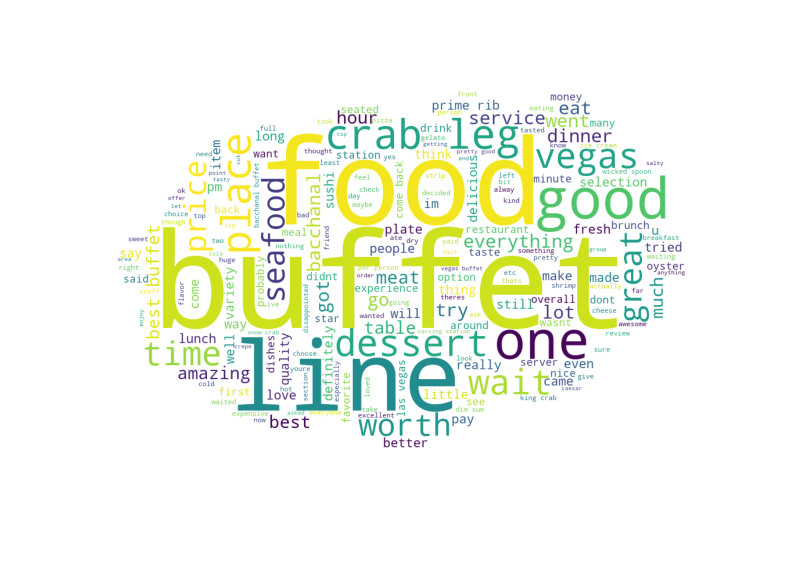

In [237]:
wc(df['text'],'white') #YORUMLARIN TAMAMINDA EN ÇOK GEÇEN KELİMELER.

In [246]:
df1=df[df['stars']==1]

In [248]:
df1

,stars,text
3,1,not worth it! too salty food and expensive! th...
12,1,"food is fine, better than most buffets. when i..."
33,1,be careful using the restroom here. while i wa...
45,1,this buffet can be summarized in words: quant...
50,1,this place used to be the best buffet i ever h...
...,...,...
10367,1,we are locals in vegas and we never hesitate t...
10377,1,if you want to wait multiple hours for horribl...
10390,1,i have eaten here for the breakfast and lunch...
10394,1,in thanksgiving day i stayed in line for three...


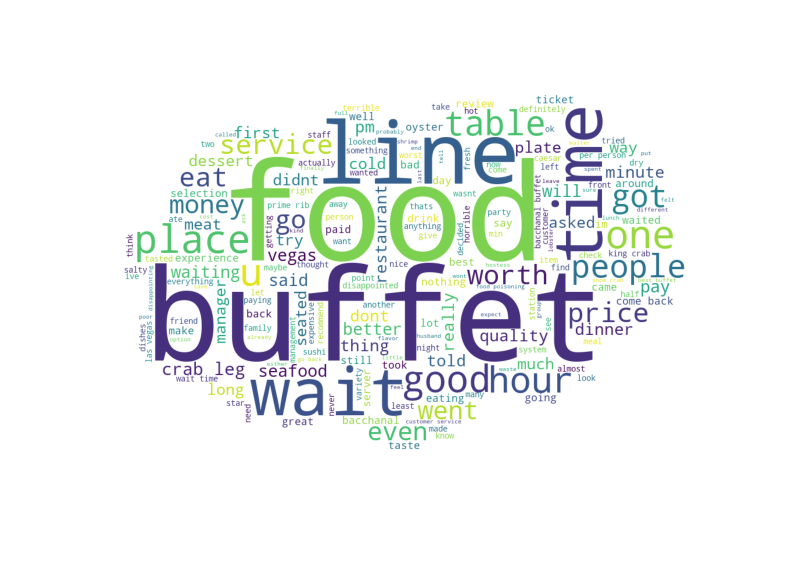

In [250]:
wc(df1['text'],'white') #1 YILDIZLI YORUMLARIN TAMAMINDA EN ÇOK GEÇEN KELİMELER.

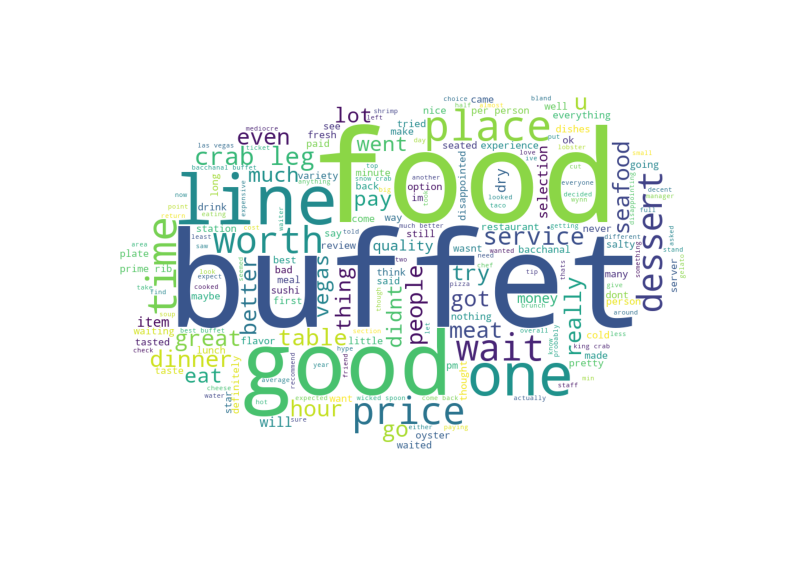

In [251]:
df2=df[df['stars']==2]
wc(df2['text'],'white')

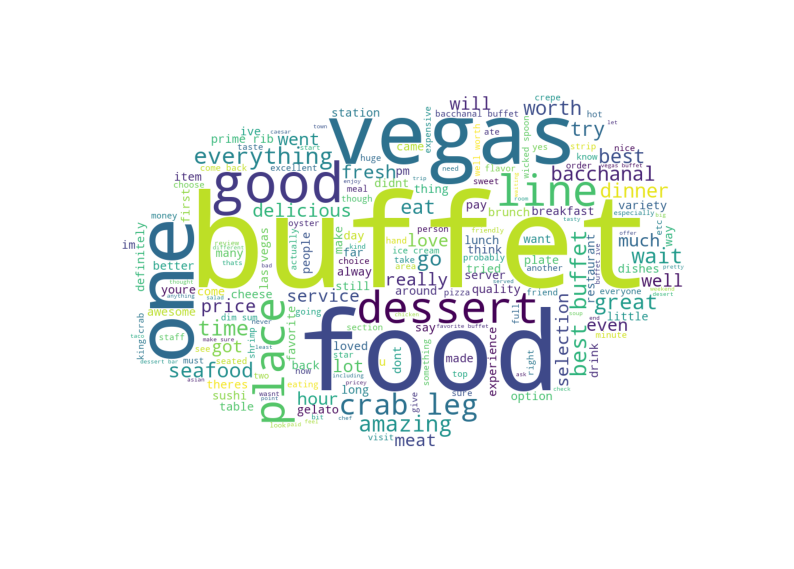

In [252]:
df5=df[df['stars']==5] #5 YILDIZLI YORUMLARIN TAMAMINDA EN ÇOK GEÇEN KELİMELER.
wc(df5['text'],'white')

In [255]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


In [258]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

In [261]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [264]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# NLTK'deki stopwords'leri indirin
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\w10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [294]:
#derste işlediğimiz stopwordsleri bulamdım
# İngilizce stopwords listesi
stop_words = set(stopwords.words('english'))



# Tüm metinleri birleştir
all_text = ' '.join(df1['text'])

# Noktalama işaretlerini kaldır
translator = str.maketrans('', '', string.punctuation)
all_text = all_text.translate(translator)

# Kelimeleri küçük harfe çevir ve böl
words = word_tokenize(all_text.lower())

# Stopwords'leri çıkar
filtered_words = [word for word in words if word not in stop_words]

# Kelime frekanslarını hesapla
word_counts = Counter(filtered_words)

# En çok geçen 10 kelimeyi al
most_common_words = word_counts.most_common(10)

# Sonuçları yazdır
print("En çok geçen 10 kelime:")
for word, count in most_common_words:
    print(f"{word}: {count}")

En çok geçen 10 kelime:
food: 1374
buffet: 1241
line: 854
get: 687
wait: 626
time: 608
us: 522
would: 509
good: 483
back: 469


In [293]:
stop_words = set(stopwords.words('english'))



# Tüm metinleri birleştir
all_text = ' '.join(df5['text'])

# Noktalama işaretlerini kaldır
translator = str.maketrans('', '', string.punctuation)
all_text = all_text.translate(translator)

# Kelimeleri küçük harfe çevir ve böl
words = word_tokenize(all_text.lower())

# Stopwords'leri çıkar
filtered_words = [word for word in words if word not in stop_words]

# Kelime frekanslarını hesapla
word_counts = Counter(filtered_words)

# En çok geçen 10 kelimeyi al
most_common_words = word_counts.most_common(10)

# Sonuçları yazdır
print("En çok geçen 10 kelime:")
for word, count in most_common_words:
    print(f"{word}: {count}")

En çok geçen 10 kelime:
buffet: 5640
food: 4044
vegas: 2585
best: 2330
good: 2029
crab: 1820
worth: 1756
time: 1740
get: 1699
great: 1614


In [268]:
from textblob import TextBlob

In [279]:
df5['sentiment'] = df5['text'].apply(lambda x: TextBlob(x).sentiment)

In [286]:
df5

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,"(0.3373304473304473, 0.5869264069264069)"
4,5,i would give this infinite stars if i could. m...,"(0.3625, 0.725)"
5,5,really enjoyed everything they had to offer. i...,"(0.18967391304347825, 0.33514492753623193)"
8,5,lots of choices. good service. line wasnt as l...,"(0.2583333333333333, 0.44166666666666665)"
10,5,best buffet as of march . beats wicked spoon a...,"(0.8, 0.6)"
...,...,...,...
10408,5,the bacchanal buffet is in my opinion the best...,"(0.2914285714285714, 0.4514285714285714)"
10409,5,we went to bacchanal on easter sunday as it wa...,"(0.52, 0.655)"
10411,5,every time we visit las vegas we go to this bu...,"(1.0, 0.3)"
10412,5,"best buffet ever! irma was great, served us be...","(0.526171875, 0.48125)"
